# Example of DBSCAN implementation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [19]:
warnings.filterwarnings('ignore')


## Data Preparation

In [20]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)


## Application of the DBSCAN method

In [21]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
dbscan_labels = dbscan.labels_


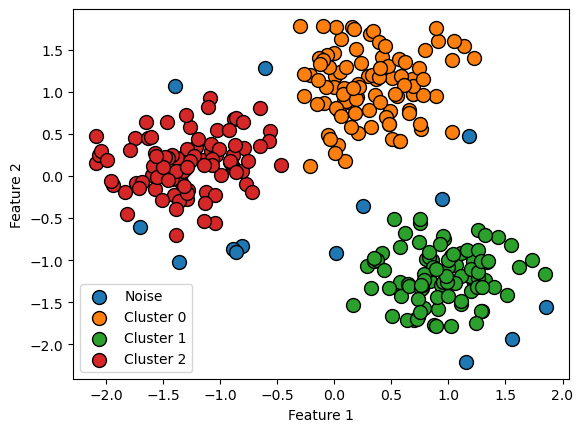

In [22]:
for i in np.unique(dbscan_labels):
    plt.scatter(X[dbscan_labels == i, 0], X[dbscan_labels == i, 1],
                label=i, s=100, edgecolor='black')
plt.legend(['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Correct classless labels

In [23]:
noise_labels = np.where(dbscan_labels == -1)[0]
umbral = 0.5
for i in noise_labels:
    point = X[i]
    density = np.sum(np.linalg.norm(X - point, axis=1) <= umbral)
    if density > 1:
        distance_to_points = np.linalg.norm(X - point, axis=1)
        neighbors = np.where(distance_to_points <= umbral)[0]
        neighbors_labels = dbscan_labels[neighbors]
        neighbors_labels = neighbors_labels[neighbors_labels != -1]
        if len(neighbors_labels) > 0:
            new_labels = np.bincount(neighbors_labels).argmax()
            dbscan_labels[i] = new_labels


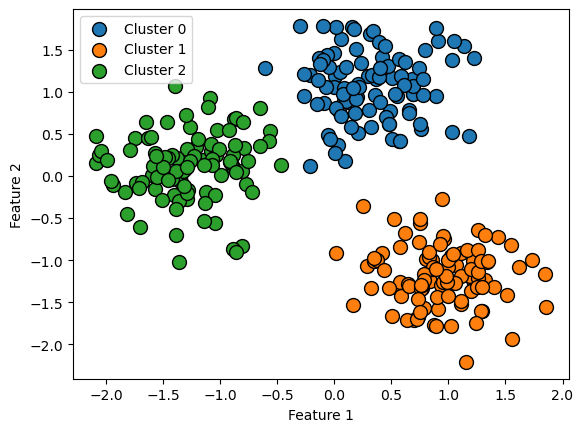

In [24]:
for i in np.unique(dbscan_labels):
    plt.scatter(X[dbscan_labels == i, 0], X[dbscan_labels == i, 1],
                label=i, s=100, edgecolor='black')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [25]:
accuracy = accuracy_score(y, dbscan_labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.67%


## Comparison with K-Means

In [26]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans_labels = kmeans.labels_


In [27]:
print("Accuracy: %.2f%%" % (accuracy_score(y, kmeans_labels) * 100.0))


Accuracy: 100.00%


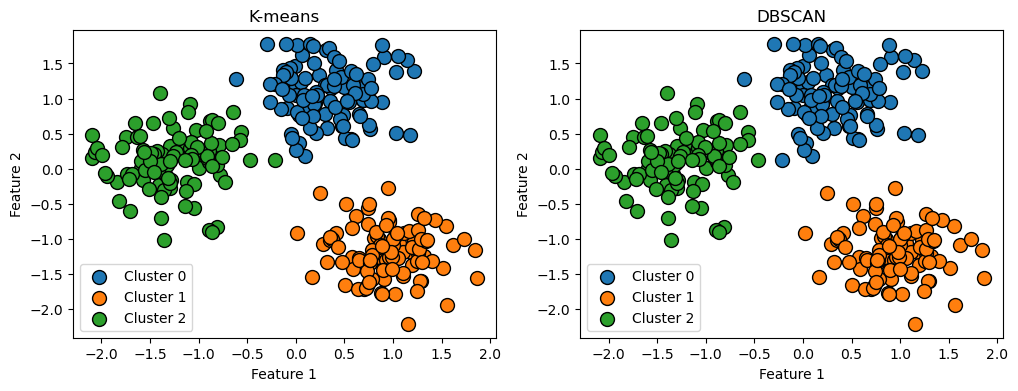

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('K-means')
for i in np.unique(kmeans_labels):
    plt.scatter(X[kmeans_labels == i, 0], X[kmeans_labels == i, 1],
                label=i, s=100, edgecolor='black')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.title('DBSCAN')
for i in np.unique(dbscan_labels):
    plt.scatter(X[dbscan_labels == i, 0], X[dbscan_labels == i, 1],
                label=i, s=100, edgecolor='black')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.show()
